## Phase 3 - deployment

#### This notebook will provide and overview how to deploy and predict the CPE in two ways

- The model was build/export in the last notebook (Phase_2_Advanced_Analytics__predictions)
<br> This notebook show another option to save/export the model using the H2O flow UI and complement the information with deployment for predictions.

The predictions will be presented in 2 ways
- Batch process 
- Online / real time predictions


<div class="alert alert-block alert-info">
<b>Export model:</b> Export the model GBM (best performance) using H2O flow UI as detailed below
</div>

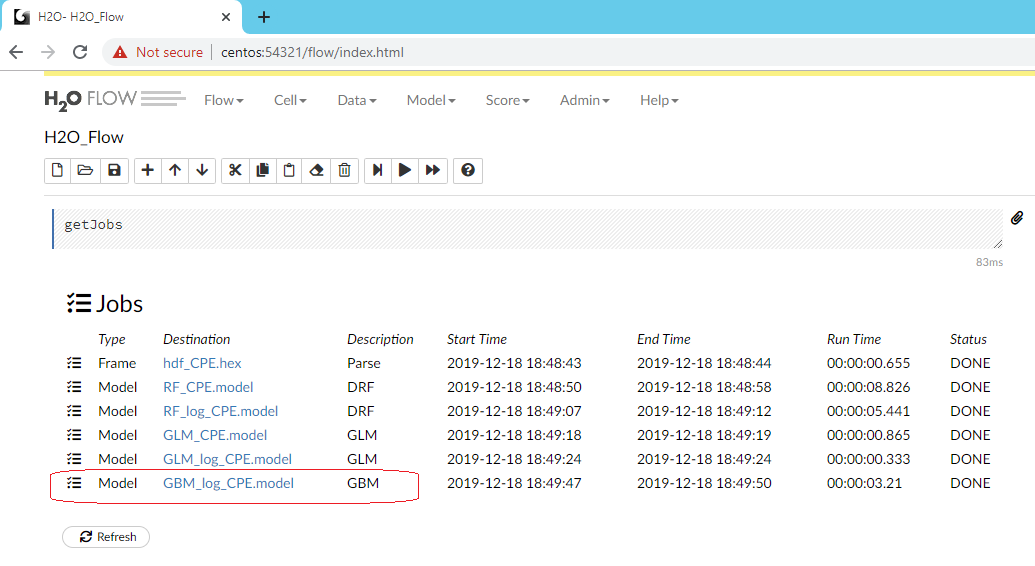

In [2]:
from IPython.display import Image
Image(filename='./data/H2O-FLOW-UI-GBM-MODEL.PNG')

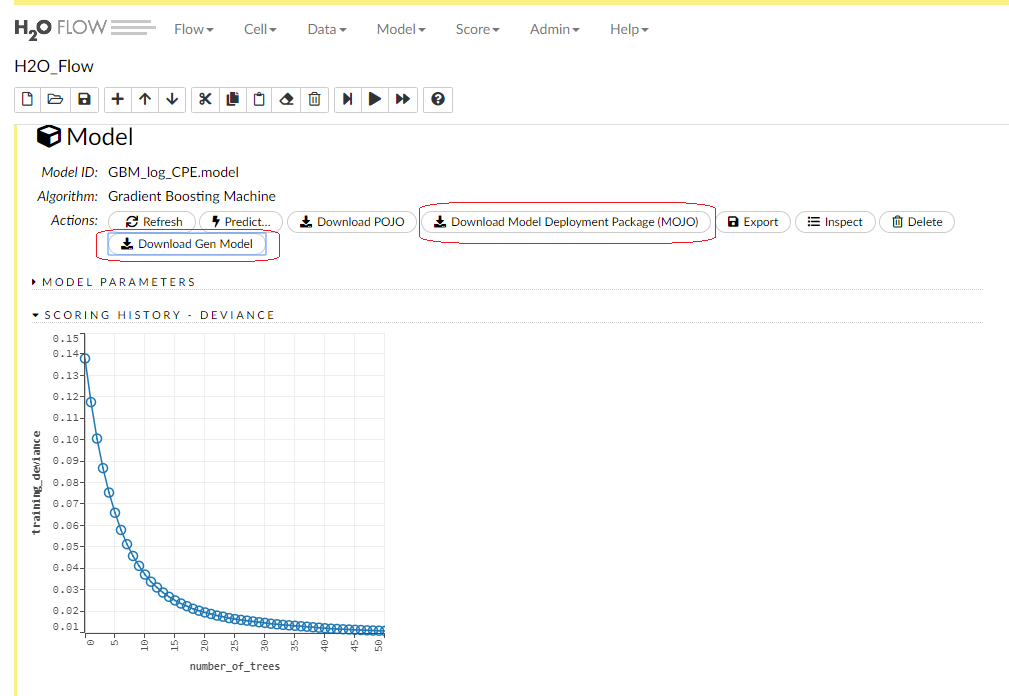

In [3]:
from IPython.display import Image
Image(filename='./data/H2O-FLOW-UI-GBM-MODEL-download.PNG')

## Sample of new campaigns to be predicted

In [21]:
import pandas as pd
df = pd.read_csv('./GBM_MODEL/New_campaings_for_predictions.csv')
df.tail(10)

,LineItemsID,URL,xyz_campaign_id,channel,channel_ad_id,gender,age,interest,spend,engagement,clicks
884,885,URL-1,1178,5,14,F,25-34,Interest - 104,110,xxx,yyy
885,886,URL-1,1178,4,11,F,25-34,Interest - 105,235,xxx,yyy
886,887,URL-1,1178,11,1,F,25-34,Interest - 106,23,xxx,yyy
887,888,URL-1,1178,4,13,F,25-34,Interest - 107,160,xxx,yyy
888,889,URL-1,1178,1,4,F,25-34,Interest - 108,33,xxx,yyy
889,890,URL-1,1178,2,13,F,25-34,Interest - 109,252,xxx,yyy
890,891,URL-1,1178,11,3,F,25-34,Interest - 110,120,xxx,yyy
891,892,URL-1,1178,11,2,F,25-34,Interest - 111,28,xxx,yyy
892,893,URL-1,1178,2,8,F,25-34,Interest - 113,135,xxx,yyy
893,894,URL-1,1178,2,5,F,25-34,Interest - 114,114,xxx,yyy


### Important attention point
- All information will  be provided for prediction (base information available in the simulated/demo data) however just the relevant information were used during the model build detailed in the Notebook: Phase_2_Advanced_Analytics__predictions  <br>
- For example LineItemsID is just an index number and do not provide relevant information and is not going to be used for prediction

<div class="alert alert-block alert-info">
<b>Batch Prediction:</b> Generate prediction for new data
</div>


#### To execute the prediction as presented below it is not necessary to have an H2O cluster running
##### The processo show below was executed in 2 steps to show in detail the process but in production environment this process must be executed in just one step

###### &emsp; Simulation in 2 steps

Step 1. batch process to run the java program
<br>Step 2. python program to link the new data and the predictions with the CPE
<br> &emsp; &emsp; Can be used any programming language to run the prediction and get the results (such as R, Python, Java, C#, ...)


### Run batch java process to gererate/score the predictions of CPE

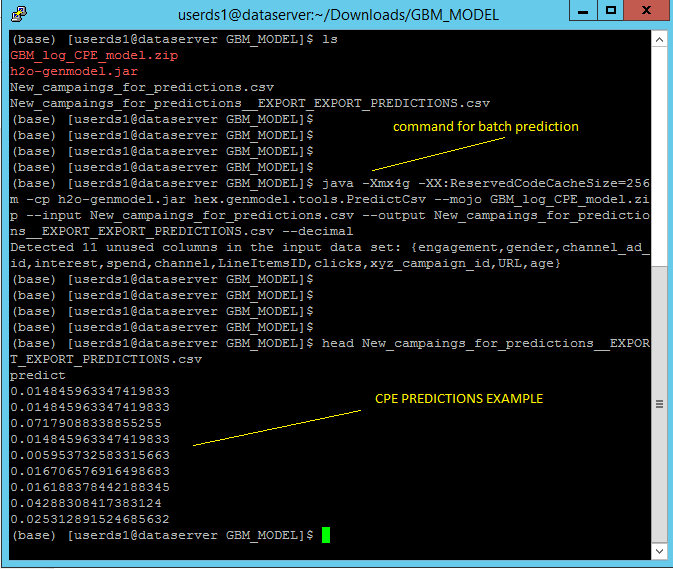

In [7]:
from IPython.display import Image
Image(filename='./data/Batch-prediction-h2o.PNG')

### Sincronize all information - new campaign data and new predictions for CPE
- Remember that the prediction was done in logarithmic scale and now is necessary to rever the result with exponential function

In [22]:
CPE_predictions = pd.read_csv('./GBM_MODEL/New_campaings_for_predictions__EXPORT_EXPORT_PREDICTIONS.csv')
CPE_predictions.tail()

,predict
889,1.324483
890,0.783198
891,0.459563
892,0.952897
893,0.794780


In [25]:
import numpy as np
df['CPE_predition_LOG'] =  CPE_predictions['predict']
df['CPE_predition'] = round(np.exp(CPE_predictions['predict']) -1, 3)
df.tail()

,LineItemsID,URL,xyz_campaign_id,channel,channel_ad_id,gender,age,interest,spend,engagement,clicks,CPE_predition_LOG,CPE_predition
889,890,URL-1,1178,2,13,F,25-34,Interest - 109,252,xxx,yyy,1.324483,2.760
890,891,URL-1,1178,11,3,F,25-34,Interest - 110,120,xxx,yyy,0.783198,1.188
891,892,URL-1,1178,11,2,F,25-34,Interest - 111,28,xxx,yyy,0.459563,0.583
892,893,URL-1,1178,2,8,F,25-34,Interest - 113,135,xxx,yyy,0.952897,1.593
893,894,URL-1,1178,2,5,F,25-34,Interest - 114,114,xxx,yyy,0.794780,1.214


<div class="alert alert-block alert-info">
<b>Online prediction:</b> Generate prediction for new data
</div>


### The online prediction could be implemented using diferent architectures such as
1. Serverless function such as Amazon AWS Lambda + API Gateway
<br> https://aws.amazon.com/lambda/?nc2=h_ql_prod_fs_lbd
    
2. Java program that use POJO/MOJO model for online prediction
<br> http://docs.h2o.ai/h2o/latest-stable/h2o-docs/productionizing.html#step-2-compile-and-run-the-mojo

3. Microservices architecture using Docker (python + flask app + NGINX for load balance)
<br> Could be implemented on-premise solution or even using cloud solutions such as container orchestration as GKE (Google Kubernetes Engine)
<br> https://cloud.google.com/kubernetes-engine/

The solution presented below show the prediction done trought one json information passed to the URL
<br> &emsp; This API could be deployed in any of the 3 options detailed above

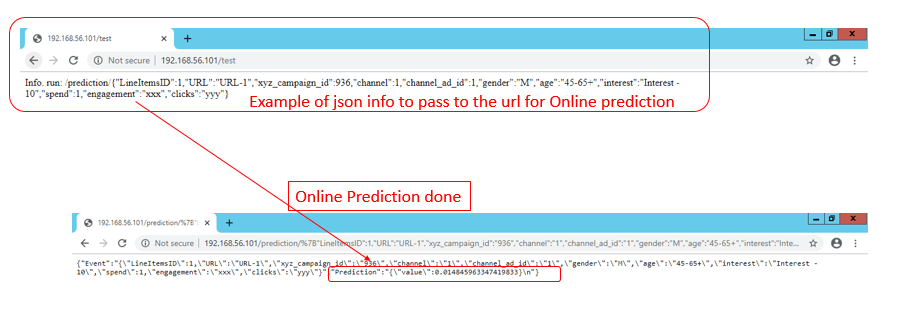

In [1]:
from IPython.display import Image
Image(filename='./data/Online-Prediction.PNG')

## Summary and final considerations

##### The model build in Phase 2 and also exported in this notebook can be deployed for batch and online predictions

- Batch process => the batch process is the way to go to predict large ammount of campaigns and for back-office analysis using some BI tools
  
- Online prediction => The online prediction using microservices architecture for example, is the way to go if the company has online interfaces integrated with lauch campaign programs. With this approach is possible to analyse specific campaign prediction
